In [1]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

2026-01-28 17:39:44.038720: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# DATA LOADING & PREPROCESSING

This section loads images from the dataset folder, preprocesses them, and splits into training/testing sets.

In [2]:
# 1. LOAD DATA FROM DATASET FOLDER

# Set paths to your cat and dog folders
cat_folder = 'dataset/cat'
dog_folder = 'dataset/dog'

# Get all image file paths
cat_images = []
for filename in os.listdir(cat_folder):
    if filename.endswith('.jpg'):
        cat_images.append(os.path.join(cat_folder, filename))

dog_images = []
for filename in os.listdir(dog_folder):
    if filename.endswith('.jpg'):
        dog_images.append(os.path.join(dog_folder, filename))

# Print how many images we found
print(f"Cat images: {len(cat_images)}")
print(f"Dog images: {len(dog_images)}")
print(f"Total images: {len(cat_images) + len(dog_images)}")

Cat images: 10832
Dog images: 10784
Total images: 21616


In [3]:
# 2. CREATE LABELS

# Create labels: 0 = Cat, 1 = Dog
cat_labels = [0] * len(cat_images)  # All cats get label 0
dog_labels = [1] * len(dog_images)  # All dogs get label 1

# Combine images and labels
all_images = cat_images + dog_images
all_labels = cat_labels + dog_labels

print(f"\nTotal images: {len(all_images)}")
print(f"Total labels: {len(all_labels)}")
print(f"Cats (0): {len(cat_labels)}, Dogs (1): {len(dog_labels)}")


Total images: 21616
Total labels: 21616
Cats (0): 10832, Dogs (1): 10784


In [4]:
# 3. SPLIT INTO TRAINING AND TESTING SETS

# Split: 80% for training, 20% for testing
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images,
    all_labels,
    test_size=0.2,        
    random_state=42,      # For reproducible results
    stratify=all_labels   # Keep equal ratio of cats/dogs in both sets
)

print(f"\nTraining images: {len(train_images)}")
print(f"Testing images: {len(test_images)}")
print(f"Training - Cats: {train_labels.count(0)}, Dogs: {train_labels.count(1)}")
print(f"Testing - Cats: {test_labels.count(0)}, Dogs: {test_labels.count(1)}")


Training images: 17292
Testing images: 4324
Training - Cats: 8665, Dogs: 8627
Testing - Cats: 2167, Dogs: 2157


In [5]:
print(f"\nUsing dataset of {len(all_images)} images")
print(f"Training images: {len(train_images)}")
print(f"Testing images: {len(test_images)}")


Using dataset of 21616 images
Training images: 17292
Testing images: 4324


In [6]:
# 5. LOAD AND PREPROCESS IMAGES

def load_image(image_path):
    """Load one image and prepare it for the model"""
    # Load image and resize to 64x64
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
    
    # Convert to array
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    # Normalize: scale pixel values from 0-255 to 0-1
    img_array = img_array / 255.0
    
    return img_array

# Load training images
print("Loading training images...")
x_train = []
for image_path in train_images:
    x_train.append(load_image(image_path))
x_train = np.array(x_train)
y_train = np.array(train_labels)

# Load testing images
print("Loading testing images...")
x_test = []
for image_path in test_images:
    x_test.append(load_image(image_path))
x_test = np.array(x_test)
y_test = np.array(test_labels)

print("\n✓ Data loaded successfully!")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

Loading training images...
Loading testing images...

✓ Data loaded successfully!
x_train shape: (17292, 64, 64, 3)
y_train shape: (17292,)
x_test shape: (4324, 64, 64, 3)
y_test shape: (4324,)


# 6. VISUALIZE SAMPLE IMAGES

Let's see what our data looks like!

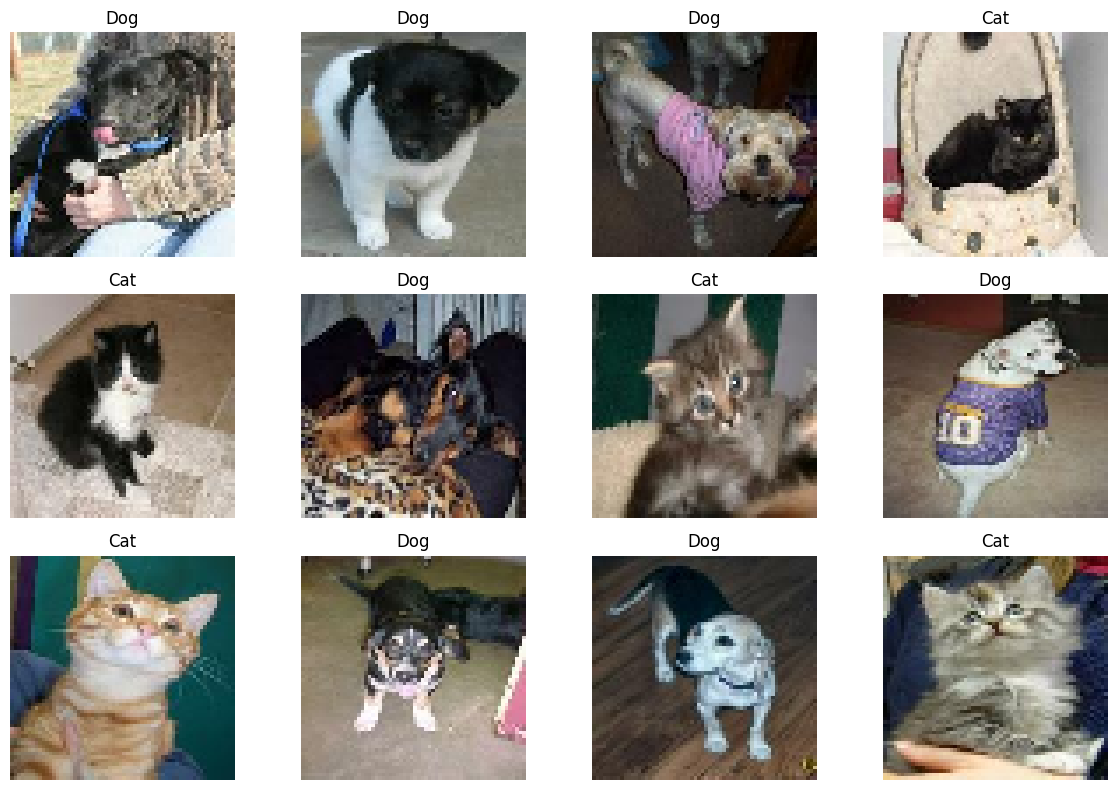


✓ Ready to train your model!


In [7]:
# Visualize first 12 images from training data
plt.figure(figsize=(12, 8))

for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i])
    
    # Show label
    label = "Cat" if y_train[i] == 0 else "Dog"
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

print("\n✓ Ready to train your model!")

# MODEL IMPLEMENTATION

Now you can build and train your CNN model using x_train, y_train, x_test, y_test

In [8]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

In [9]:
from keras.layers import Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping 


cnn = Sequential()

cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))

cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))

cnn.add(Flatten())

cnn.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
cnn.add(Dropout(0.5))
cnn.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation='sigmoid'))

cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/Users/sahilbhatti/Desktop/deep_learning/catVsDog-cnn/cnd_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = cnn.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)


Epoch 1/25
541/541 ━━━━━━━━━━━━━━━━━━━━ 100s 180ms/step - accuracy: 0.5100 - loss: 1.5435 - val_accuracy: 0.4988 - val_loss: 0.9140
Epoch 2/25
541/541 ━━━━━━━━━━━━━━━━━━━━ 140s 258ms/step - accuracy: 0.5170 - loss: 0.8217 - val_accuracy: 0.5682 - val_loss: 0.7837
Epoch 3/25
541/541 ━━━━━━━━━━━━━━━━━━━━ 89s 164ms/step - accuracy: 0.5870 - loss: 0.8403 - val_accuracy: 0.6686 - val_loss: 0.8046
Epoch 4/25
541/541 ━━━━━━━━━━━━━━━━━━━━ 90s 167ms/step - accuracy: 0.6940 - loss: 0.8261 - val_accuracy: 0.6700 - val_loss: 0.9564
Epoch 5/25
541/541 ━━━━━━━━━━━━━━━━━━━━ 93s 171ms/step - accuracy: 0.7427 - loss: 0.8352 - val_accuracy: 0.7655 - val_loss: 0.8101
Epoch 6/25
541/541 ━━━━━━━━━━━━━━━━━━━━ 91s 169ms/step - accuracy: 0.7709 - loss: 0.8235 - val_accuracy: 0.6122 - val_loss: 1.2117
Epoch 7/25
541/541 ━━━━━━━━━━━━━━━━━━━━ 91s 167ms/step - accuracy: 0.7928 - loss: 0.8088 - val_accuracy: 0.7805 - val_loss: 0.8066
Epoch 8/25
541/541 ━━━━━━━━━━━━━━━━━━━━ 90s 166ms/step - accuracy: 0.8015 - loss:

In [11]:
test_loss, test_accuracy = cnn.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8469 - loss: 0.7438
Test Loss: 0.7437595725059509
Test Accuracy: 0.846900999546051


In [12]:
cnn.save("models/cnn_model.keras")

In [13]:
prediction = cnn.predict(x_test[0].reshape(1, 64, 64, 3))

if prediction[0][0] > 0.5:
    print("Dog 🐶")
else:
    print("Cat 🐱")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Cat 🐱


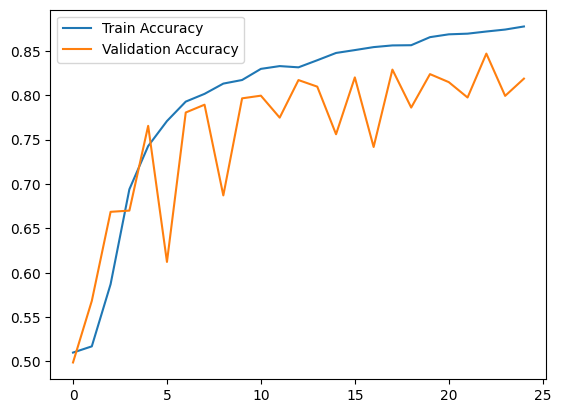

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [7]:
from tensorflow import keras

model = keras.models.load_model("models/cnn_model.keras")

def predict_image():
    folder = input("Enter the folder name: ")
    img_name = input("Enter the image name (without extension): ")
    ext = input("Enter the extension (jpg/png): ")

    image_path = f"{folder}/{img_name}.{ext}"

    # load image
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(64, 64)
    )

    # convert to array
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    # normalize (same as training)
    img_array = img_array / 255.0

    # add batch dimension
    img_array = np.expand_dims(img_array, axis=0)

    # predict
    prediction = model.predict(img_array, verbose=0)[0][0]

    # decision
    if prediction > 0.5:
        print(f"{image_path} → Dog 🐶 ({prediction:.2f})")
    else:
        print(f"{image_path} → Cat 🐱 ({prediction:.2f})")

predict_image()


test cases/1.jpg → Dog 🐶 (0.76)
